# GDP Analysis

GDP is a fundamental metric used by economists and policymakers to assess the size and performance of an economy. It encompasses consumer spending, business investments, government expenditures, and net exports. It is often used to compare economic performance between countries and assess the impact of various economic policies and events.

OBJECTIVE: Through statistical methods and data visualization, the project will examine GDP trends over multiple years, identify key factors influencing GDP fluctuations, and explore correlations with other economic indicators. The analysis will provide valuable insights for policymakers and stakeholders to make informed decisions and develop strategies for sustainable economic growth.

In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo

In [2]:
df=pd.read_csv('gdp.csv')
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


## Description of each column

In [3]:
df['Country Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [4]:
df['Country Code'].describe()

count     11507
unique      256
top         HKG
freq         57
Name: Country Code, dtype: object

In [5]:
df['Year'].describe()

count    11507.000000
mean      1991.265230
std         15.886648
min       1960.000000
25%       1978.000000
50%       1993.000000
75%       2005.000000
max       2016.000000
Name: Year, dtype: float64

In [6]:
df['Value'].describe()

count    1.150700e+04
mean     1.005972e+12
std      4.533056e+12
min      8.824448e+06
25%      2.056874e+09
50%      1.436880e+10
75%      1.796394e+11
max      7.904923e+13
Name: Value, dtype: float64

In [7]:
# Finding number of unique countries in the dataset
df['Country Name'].nunique()

256

In [8]:
# Finding number of years of data we are having for India
dfIndia=df[df['Country Name']=='India']
dfIndia['Year'].nunique()

57

In [9]:
# Finding the World's GDP in the year 1969
dfWorld=df[df['Country Name']=='World']
dfWorld1969=dfWorld[dfWorld['Year']==1969]
gdp=dfWorld1969['Value']
print(gdp)

2258    2.690798e+12
Name: Value, dtype: float64


In [10]:
# % of GDP growth of India in 1994 as compared to 1993 
gdp1993=dfIndia[dfIndia['Year']==1993]['Value'].sum()
gdp1994=dfIndia[dfIndia['Year']==1994]['Value'].sum()
growth = ((gdp1994-gdp1993)/gdp1993)*100
print(round(growth,2),"%")

17.18 %


## Analyzing a country as one of the examples

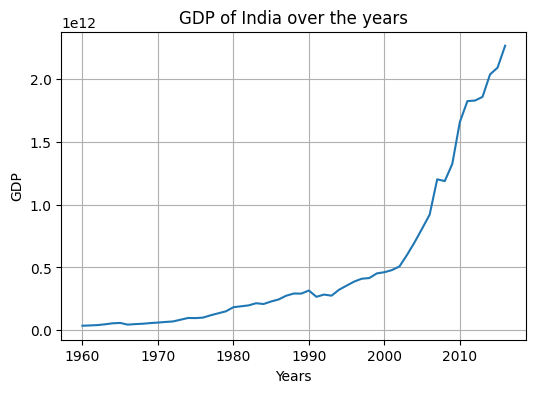

In [11]:
dfEx=df[df['Country Name']=='India']
dfEx.plot(kind='line',figsize=(6,4),x='Year',y='Value',xlabel='Years',ylabel='GDP',legend=False,grid=True)
plt.title("GDP of India over the years")
plt.show()

In [12]:
# Adding a new column GDP (GDP growth) to the dataframe
data=dfEx.values
gdpChange=[0]

for i in range(1,len(data)):
    prev=data[i-1][3]
    cur=data[i][3]
    gdpChange.append(round((cur-prev)/prev,2))
dfEx.assign(GDP=gdpChange).head(10)

,Country Name,Country Code,Year,Value,GDP
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,0.06
6076,India,IND,1962,4.159907e+10,0.07
6077,India,IND,1963,4.777600e+10,0.15
6078,India,IND,1964,5.572687e+10,0.17
6079,India,IND,1965,5.876042e+10,0.05
6080,India,IND,1966,4.525364e+10,-0.23
6081,India,IND,1967,4.946617e+10,0.09
6082,India,IND,1968,5.237732e+10,0.06
6083,India,IND,1969,5.766833e+10,0.10


## Adding GDP growth on whole dataset

In [13]:
final_data=[]

for countryName in df['Country Name'].unique():
    dfCountry=df[df['Country Name']==countryName]
    
    gdp_growth=[0]
    
    dataValues=dfCountry.values
    for i in range(1,len(dataValues)):
        prevGDP=dataValues[i-1][3]
        currGDP=dataValues[i][3]
        gdp_growth.append(round(((currGDP-prevGDP)/prevGDP)*100,2))
    dfCountry=dfCountry.assign(GDP = gdp_growth)
    final_data.append(dfCountry)
    
df=pd.concat(final_data,axis=0)
df.head(10)

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
5,Arab World,ARB,1973,5.501839e+10,27.02
6,Arab World,ARB,1974,1.051458e+11,91.11
7,Arab World,ARB,1975,1.163370e+11,10.64
8,Arab World,ARB,1976,1.448462e+11,24.51
9,Arab World,ARB,1977,1.673083e+11,15.51


In [14]:
df.groupby('Country Name').max()['Value'].sort_values(ascending=False).head(10)

Country Name
World                        7.904923e+13
High income                  5.036240e+13
OECD members                 4.937008e+13
Post-demographic dividend    4.673504e+13
IDA & IBRD total             2.948247e+13
Low & middle income          2.870476e+13
Middle income                2.829277e+13
IBRD only                    2.739661e+13
Europe & Central Asia        2.365470e+13
East Asia & Pacific          2.248043e+13
Name: Value, dtype: float64

## Plotting using Plotly

In [22]:
#Plotting World's GDP
figWorld=px.line(dfWorld,x='Year',y='Value',title="World's GDP Analysis")
figWorld

In [16]:
pyo.plot(figWorld,filename="World's GDP.html")

"World's GDP.html"

## Plotting graphs of all countries

In [17]:
#creating a seperate directory
os.mkdir('GDP of Individual country')

for country in df['Country Name'].unique():
    dfC=df[df['Country Name']==country]
    figC=px.line(dfC,x='Year',y='Value',title=country+" GDP Analysis")
    #creating a seperate html file for each country
    pyo.plot(figC,filename='GDP of Individual Country/'+country+'.html',auto_open=False)

## Comparing GDP of all countries


In [25]:
figAll=px.line(df,x='Year',y='GDP',title='GDP Analysis of All Countries', color='Country Name')
pyo.plot(figAll,filename='All countries.html')

'All countries.html'

## GDP comparision between India and China

In [24]:
country1=df[df['Country Name']=='India']
country2=df[df['Country Name']=='China']
dfIC=pd.concat([country1,country2],axis=0)
figIC=px.line(dfIC,x='Year',y='GDP',title='GDP Analysis of India and China',color='Country Name')
pyo.plot(figIC,filename='IndiaChina.html')

'IndiaChina.html'

## GDP comparison among specific countries

In [23]:
#providing a list of countries with their country codes
lst=['IND','CHN','USA','ITA','ARB']
def compareGDP(lst):
    dfCs=[]
    df_Cs=pd.DataFrame()
    for i in lst:
        dfCs.append(df[df['Country Code']==i])
        df_Cs=pd.concat(dfCs,axis=0)
    figCs=px.line(df_Cs,x='Year',y='GDP',title='GDP comparision - '+'|'.join(lst),color='Country Name')
    pyo.plot(figCs,filename = 'GDP comparision.html')
    
compareGDP(['IND','USA','ARB'])



## GDP growth between 1960-2016


In [29]:
dfs=[]
for country_name in df['Country Name'].unique():
    dfgdpAll=df[df['Country Name']==country_name]
    
    if(len(dfgdpAll)==57):
        dfs.append(dfgdpAll)
dfgdpAll=pd.concat(dfs, axis=0)
figgdpAll=px.line(dfgdpAll,x='Year',y='GDP',title='GDP of all countries',color='Country Name')
pyo.plot(figgdpAll,filename='GDP.html')

'GDP.html'